## Data cleaning exercise 

Fundamental Data Learning | Week 1

The following are the head() of 2 provided data frames for this excercise:
- df1 is taken from steps.csv
- df2 is taken from survey.csv

steps.csv is using semicolon for its separator, which is not the standard csv separator.
Therefore in .read_csv command, the type of separator must be defined.

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('steps.csv', sep=';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In the next step, I measure the median of steps per day from dataframe number 1.
Then I transpose the dataframe so it has 2 columns only (index which shows date and the median itself) so that later on it's easier to make graph from.

In [30]:
#measure median of steps per day
median_of_steps = pd.DataFrame(df1.median().to_dict(),index=[df1.index.values[-1]])
median_of_steps = median_of_steps.round() #round the number
median_of_steps.drop('id', axis=1, inplace=True) #remove column with id index (clean up)

#transpose the dataframe
median_of_steps = median_of_steps.transpose()
median_of_steps = median_of_steps.rename(columns={928: 'median'})
median_of_steps_new = median_of_steps['median'].dropna().reset_index().copy()
median_of_steps_new

,index,median
0,20-6-2013,834.0
1,21-6-2013,8561.0
2,22-6-2013,9980.0
3,23-6-2013,5652.0
4,24-6-2013,7740.0
...,...,...
322,8-5-2014,5378.0
323,9-5-2014,7235.0
324,10-5-2014,6627.0
325,11-5-2014,3120.0


The index column which shows the date needs to be adjusted to date time type to be able to show the date on the graph as follows:

In [31]:
median_of_steps_new['index'] = pd.to_datetime(median_of_steps_new['index'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   327 non-null    datetime64[ns]
 1   median  327 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.2 KB


The below graph shows the median of steps daily with month on the x axis. It's interesting that there are a few points/ days which median is either so low or so high. Also that between July 2013 to May 2014, there are more data registered.

Text(0.5, 0.98, 'Median of steps daily')

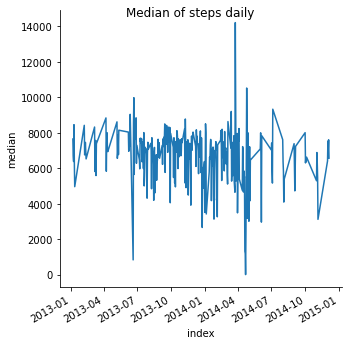

In [69]:
g = sns.relplot(x="index", y="median", kind="line", data=median_of_steps_new)
g.fig.autofmt_xdate()

g.fig.suptitle('Median of steps daily')

The below is the median of steps in KDE displot graph. What's interesting is that there's a big deep curve in around April 2014. This type of curve shows the range of median numbers nicely.

Text(0.5, 0.98, 'Median of steps daily')

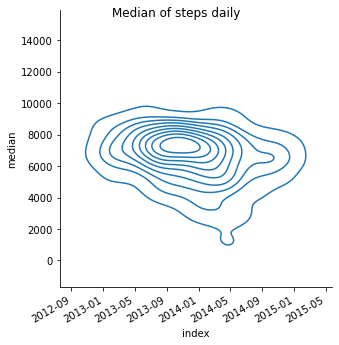

In [70]:
x = sns.displot(median_of_steps_new, x="index", y="median", kind="kde")
x.fig.autofmt_xdate()

x.fig.suptitle('Median of steps daily')

The below is the median of steps in displot bar graph. With the below graph, it's interesting that we can see the mean of the median steps are just before the highest peak in the graph. I'm not sure if the graph is correct however, since the X and Y axis doesn't show the same values as the previous charts. To my limited undestanding of statistics, the graph below has negative skew.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


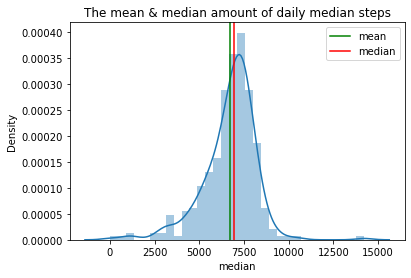

In [77]:
mean_size = median_of_steps_new['median'].mean()
median_size = median_of_steps_new['median'].median()

sns.distplot(median_of_steps_new['median'], kde=True)
plt.axvline(mean_size, 0, 100, color='green', label='mean')
plt.axvline(median_size, 0, 100, color='red', label='median')
plt.legend()
plt.title('The mean & median amount of daily median steps')
plt.show()

#How can I make this with the same data as the above?

In [76]:
#In this exercise, I'm only using 1 csv. Should I actually use both? I was not sure.
#I really don't understand what normality, skewness, outliers mean. Can this please be explained a bit more in class?